In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv('salary.csv')

In [30]:
data.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


In [31]:
data.shape

(32561, 5)

In [32]:
data["income"]= pd.factorize(data.income)[0]

In [33]:
data.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


In [34]:
data["income"] = data["income"].apply(pd.to_numeric)

In [35]:
data.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


In [36]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [37]:
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [38]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

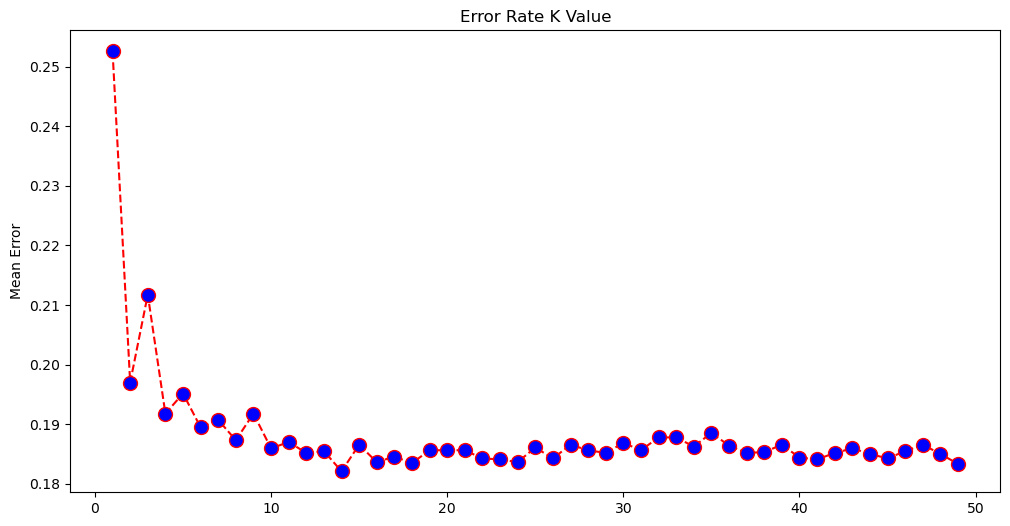

In [47]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1,50), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.ylabel('Mean Error')

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [49]:
#prediction

pred1 = [[68, 9, 0, 40]]
result = model.predict(sc.transform(pred1))

In [50]:
result

array([0], dtype=int64)

In [52]:
Y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion matrix : {cm}")
print(f"Accuracy : {accuracy_score(Y_test, Y_pred)*100}")

Confusion matrix : [[4701  265]
 [ 921  626]]
Accuracy : 81.79026562260096
